In [204]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [75]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 'turbidity', 'sugars', 'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour', 'sulphites']

cols_new = ['alcohol_by_weight', 'bitterness', 'nitrogen', 'turbidity', 'sugars', 'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']

In [76]:
df = pd.read_table("beer_ratings.txt", names = cols)

In [77]:
df = df[cols_new]

In [78]:
df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,4.964243,9.637821,0.628862,0.939390,16.305962,68.374036,18.389957,0.966954,3.803814,14.106389,14.020433,67.323718
std,0.521894,1.852364,0.187830,0.662604,8.465123,35.483428,10.147082,0.001937,0.157151,3.726049,10.288885,10.047955
min,4.000000,5.700000,0.220000,0.000000,7.560000,9.384000,4.000000,0.960640,3.240000,7.095000,1.875000,38.000000
25%,4.523810,8.300000,0.490000,0.332000,11.970000,55.522000,10.000000,0.965770,3.700000,11.825000,6.562500,60.000000
50%,4.809524,9.300000,0.620000,0.896400,13.860000,62.560000,16.000000,0.966935,3.800000,13.330000,11.250000,64.000000
75%,5.238095,10.700000,0.740000,1.494000,17.010000,71.944000,24.000000,0.968100,3.900000,15.748750,18.515625,74.000000
max,7.095238,17.000000,1.680000,3.320000,86.940000,477.020000,69.000000,0.973200,4.400000,43.000000,90.312500,94.000000


Now I need to split the data up into independent and dependent variables

In [79]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = cols_new)

In [80]:
MinMaxScaler =  MinMaxScaler()
df = pd.DataFrame(MinMaxScaler.fit_transform(df), columns = cols_new)

In [81]:
df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.311525,0.348480,0.280043,0.282949,0.110178,0.126145,0.221384,0.502736,0.486047,0.195276,0.137334,0.523638
std,0.168612,0.163926,0.128650,0.199579,0.106641,0.075878,0.156109,0.154232,0.135475,0.103775,0.116341,0.179428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169231,0.230088,0.184932,0.100000,0.055556,0.098662,0.092308,0.408439,0.396552,0.131737,0.053004,0.392857
50%,0.261538,0.318584,0.273973,0.270000,0.079365,0.113712,0.184615,0.501194,0.482759,0.173653,0.106007,0.464286
75%,0.400000,0.442478,0.356164,0.450000,0.119048,0.133779,0.307692,0.593949,0.568966,0.241018,0.188163,0.642857
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
X = df.iloc[:, :-1] # Independent Variables

In [83]:
y = df.iloc[:, -1] # Dependent Variables

When running the model on every variable we have, it doesn't produce a good result so I need to limit them based on how good they correlate with rating scores

Text(0.5, 1.0, 'Correlation Matrix')

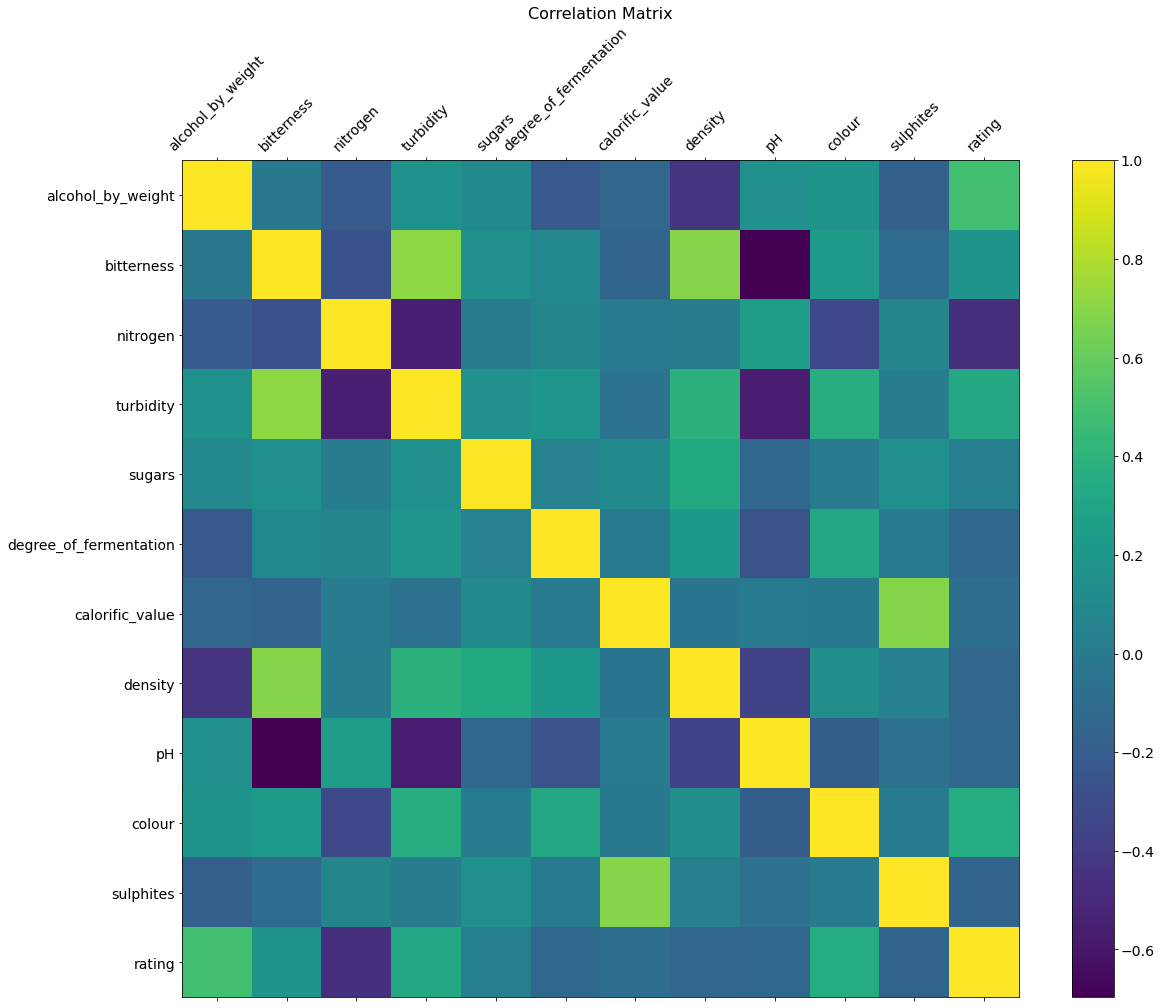

In [84]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize = 14, rotation = 45)
plt.yticks(range(df.shape[1]), df.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize = 16)

I'm going to test it manually first by taking each variable and removing them one by one see which is doing the most damage, then I can remove again and again etc.

So what if we made a model with just these?

In [86]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              916.8
Date:                Mon, 21 Dec 2020   Prob (F-statistic):                        0.00
Time:                        18:10:43   Log-Likelihood:                          384.70
No. Observations:                 748   AIC:                                     -747.4
Df Residuals:                     737   BIC:                                     -696.6
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [87]:
print('Parameters: ', results.params)
print()
print('R2: ', results.rsquared)

Parameters:  alcohol_by_weight         0.463984
bitterness                0.453406
nitrogen                 -0.199885
turbidity                 0.054073
sugars                    0.043024
degree_of_fermentation   -0.082537
calorific_value           0.108394
density                  -0.072145
pH                        0.400281
colour                    0.432638
sulphites                -0.029852
dtype: float64

R2:  0.9318991205222663


In [88]:
predictions = results.predict(X_test)

In [91]:
prediction_error = y_test - predictions
prediction_error.mean()

-0.0009372961408778155

In [218]:
lm = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores.mean()

0.4106402527937127

In [211]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 12))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)            

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11]}],
             return_train_score=True, scoring='r2', verbose=1)

In [212]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009779,0.001328,0.001996,0.000002,1,{'n_features_to_select': 1},0.129212,0.133639,0.191642,0.169116,...,0.175189,0.044943,11,0.229323,0.229559,0.216860,0.220534,0.281914,0.235638,0.023660
1,0.007386,0.001363,0.001589,0.000495,2,{'n_features_to_select': 2},0.329310,0.340538,0.371457,0.407588,...,0.381982,0.047969,10,0.418235,0.415917,0.409609,0.397586,0.383404,0.404950,0.012938
2,0.006183,0.001161,0.001796,0.000401,3,{'n_features_to_select': 3},0.366955,0.368203,0.365428,0.426454,...,0.403151,0.048618,9,0.437317,0.437359,0.437840,0.420936,0.403728,0.427436,0.013481
3,0.005984,0.001414,0.001600,0.000483,4,{'n_features_to_select': 4},0.386114,0.351862,0.394680,0.425767,...,0.409638,0.046466,8,0.443790,0.450649,0.441714,0.432242,0.415247,0.436728,0.012248
4,0.005978,0.000896,0.001607,0.000499,5,{'n_features_to_select': 5},0.407275,0.347786,0.411235,0.432122,...,0.421859,0.052616,2,0.455783,0.467564,0.454394,0.447969,0.426267,0.450395,0.013622
5,0.004184,0.000389,0.000997,0.000002,6,{'n_features_to_select': 6},0.418234,0.352398,0.417866,0.434513,...,0.426140,0.049577,1,0.458214,0.471886,0.458243,0.452217,0.432468,0.454606,0.012811
6,0.004788,0.001168,0.001596,0.000489,7,{'n_features_to_select': 7},0.416508,0.339696,0.416090,0.428653,...,0.420634,0.051594,3,0.458721,0.473333,0.458611,0.452925,0.433289,0.455376,0.012946
7,0.004189,0.000747,0.001396,0.000488,8,{'n_features_to_select': 8},0.412888,0.331668,0.415722,0.419115,...,0.415082,0.052020,4,0.459442,0.474966,0.458760,0.453697,0.434507,0.456274,0.013008
8,0.002793,0.000399,0.001197,0.000399,9,{'n_features_to_select': 9},0.413224,0.324647,0.416886,0.419879,...,0.412749,0.052270,7,0.459793,0.476078,0.458991,0.453774,0.435821,0.456892,0.012920
9,0.002393,0.000489,0.001396,0.000488,10,{'n_features_to_select': 10},0.413342,0.324032,0.417242,0.421480,...,0.413195,0.052755,5,0.459863,0.476085,0.459151,0.453872,0.436317,0.457057,0.012764


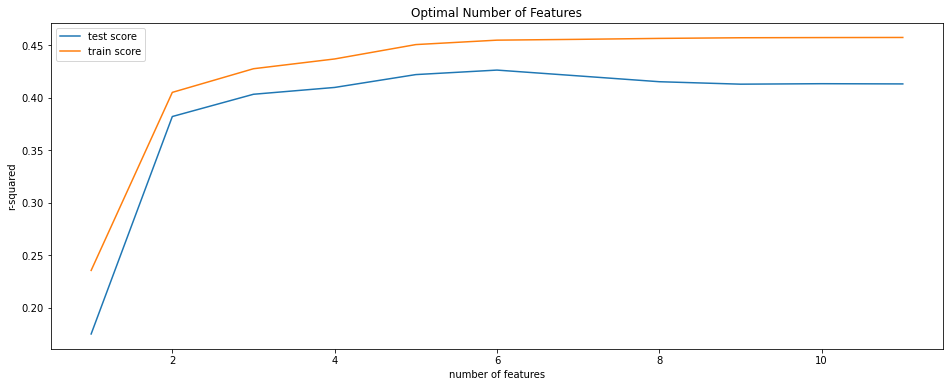

In [213]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [216]:
n_features_optimal = 11

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.28400929106784467


#### Decision Tree

In [190]:
rt = DecisionTreeRegressor(max_depth = 5)
rt.fit(X_train, y_train)
y_pred = rt.predict(X_test) 

In [191]:
diff = y_test - y_pred

In [192]:
np.mean(diff)

-0.006935046440116683

In [193]:
rt.score(X_train, y_train)

0.6087189581674368

In [194]:
rt.score(X_test, y_test)

0.29684067779906254

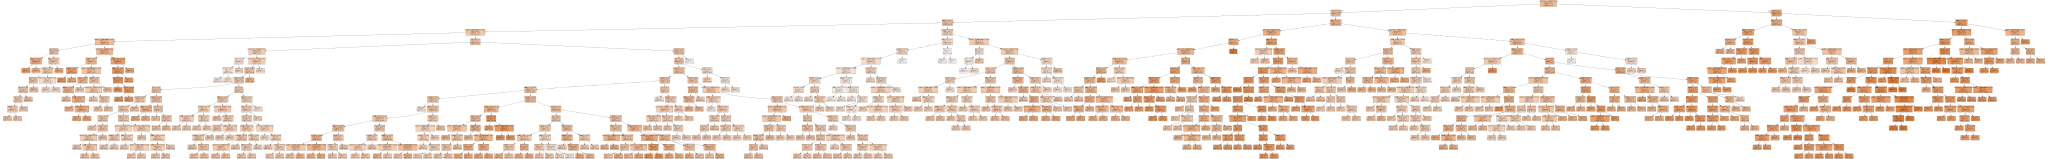

In [155]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(rt, feature_names = list(X), class_names = sorted(y.unique()), filled = True)
graphviz.Source(dot_data)

In [156]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.13380439245491146


In [157]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.03619667503031611


In [158]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.19025423787741524


In [159]:
print('R Squared Score is:', rt.score(X_train, y_train))

R Squared Score is: 0.9891233042365061


In [160]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns), reverse = True):
    print (f'{name}:', f'{round(100 * importance, 2)}%') 

alcohol_by_weight: 31.33%
colour: 17.98%
nitrogen: 12.08%
sulphites: 7.15%
degree_of_fermentation: 5.61%
calorific_value: 5.29%
bitterness: 5.27%
turbidity: 4.56%
pH: 4.04%
density: 4.0%
sugars: 2.69%


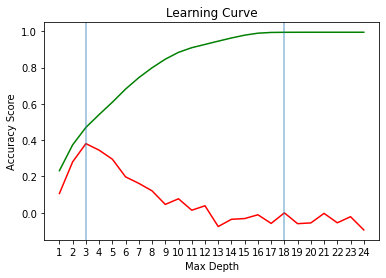

In [198]:
l = []
n = []
m = []
for i in range(1, 25):
    n.append(i)
    rt = DecisionTreeRegressor(max_depth = i)
    rt.fit(X_train, y_train)
    l.append(rt.score(X_train, y_train))
    m.append(rt.score(X_test, y_test))
plt.plot(n, l, 'g-')
plt.plot(n, m, 'r-')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.axvline(x = 18, alpha = 0.5)
plt.axvline(x = 3, alpha = 0.5)
plt.xticks(np.arange(1,25))
plt.show()

The model is clearly overfitted past a max depth of 3

Need to do some cross validation 

In [199]:
from sklearn.model_selection import cross_val_score

In [202]:
scores = cross_val_score(rt, X, y, cv=5, scoring=)

In [203]:
scores

array([-1.95565997e+01, -2.37828309e+01,  2.39813905e-02, -9.41093521e+00,
       -3.74242542e+01])